# Analisys of VK dataframes

## TODO: seaborn should be used

In [235]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse

Values in csv file are stored in json format. That is done to simplify decoding objects (i.e. dates, some infos in attach column).

In [236]:
df = pd.read_csv("dataframe.csv")
df["date"] = df["date"].apply(lambda x: parse(x))

In [237]:
df.head()

,date,id,text,rep_count,likes,com_count,attach,attachs_count
0,2021-06-16 13:20:55,3346,NaN,0,1,0,"[{'photo': {'id': 457243133, 'owner_id': -1757...",2
1,2021-06-30 09:00:00,3392,Выполнены работы по замене участка стояка ГВС ...,0,0,0,"[{'photo': {'id': 457243058, 'owner_id': -1757...",3
2,2021-06-30 08:00:00,3391,Выполнены работы по замене участка стояка ГВС ...,0,0,0,"[{'photo': {'id': 457243056, 'owner_id': -1757...",2
3,2021-06-30 07:00:00,3390,Уважаемые жители! \n \nООО «ЖКС Курортного рай...,0,0,0,"[{'photo': {'id': 457242978, 'owner_id': -1757...",1
4,2021-06-29 14:35:17,3389,☎Количество обращений граждан в аварийно-диспе...,0,0,0,"[{'photo': {'id': 457243139, 'owner_id': -1757...",1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1771 non-null   datetime64[ns]
 1   id             1771 non-null   int64         
 2   text           1524 non-null   object        
 3   rep_count      1771 non-null   int64         
 4   likes          1771 non-null   int64         
 5   com_count      1771 non-null   int64         
 6   attach         1771 non-null   object        
 7   attachs_count  1771 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 110.8+ KB


Then we split column date for grouping values. 

In [239]:
df["year"]=df['date'].apply(lambda x: x.year)
df["month"]=df['date'].apply(lambda x: x.month)
df["day"]=df['date'].apply(lambda x: x.day)
df["week_day"]=df['date'].apply(lambda x: x.weekday())
df["hour"]=df['date'].apply(lambda x: x.hour)

In [240]:
df.head()

,date,id,text,rep_count,likes,com_count,attach,attachs_count,year,month,day,week_day,hour
0,2021-06-16 13:20:55,3346,NaN,0,1,0,"[{'photo': {'id': 457243133, 'owner_id': -1757...",2,2021,6,16,2,13
1,2021-06-30 09:00:00,3392,Выполнены работы по замене участка стояка ГВС ...,0,0,0,"[{'photo': {'id': 457243058, 'owner_id': -1757...",3,2021,6,30,2,9
2,2021-06-30 08:00:00,3391,Выполнены работы по замене участка стояка ГВС ...,0,0,0,"[{'photo': {'id': 457243056, 'owner_id': -1757...",2,2021,6,30,2,8
3,2021-06-30 07:00:00,3390,Уважаемые жители! \n \nООО «ЖКС Курортного рай...,0,0,0,"[{'photo': {'id': 457242978, 'owner_id': -1757...",1,2021,6,30,2,7
4,2021-06-29 14:35:17,3389,☎Количество обращений граждан в аварийно-диспе...,0,0,0,"[{'photo': {'id': 457243139, 'owner_id': -1757...",1,2021,6,29,1,14


**Now you can create Pivot tables like**: (year/month/week day etc.)-mean(number of likes/comments/reposts etc.)-count of items

In [241]:
year_likes = pd.pivot_table(df, index=["year"], values=["likes"], aggfunc=[np.mean, len])
year_likes.columns = ['mean of likes per post', 'num of posts']
    
month_likes = pd.pivot_table(df, index=["month"], values=["likes"], aggfunc=[np.mean, len])
month_likes.columns = ['mean of likes per post', 'num of posts']

weekday_likes = pd.pivot_table(df, index=["week_day"], values=["likes"], aggfunc=[np.mean, len])
weekday_likes.columns = ['mean of likes per post', 'num of posts']

hour_likes = pd.pivot_table(df, index=["hour"], values=["likes"], aggfunc=[np.mean, len])
hour_likes.columns = ['mean of likes per post', 'num of posts']

In [242]:
def plot_vk(params1, params2):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    ax1.plot(params1, 'tab:orange', marker = 'o')
    ax2.plot(params2, 'tab:green', marker = 'o')

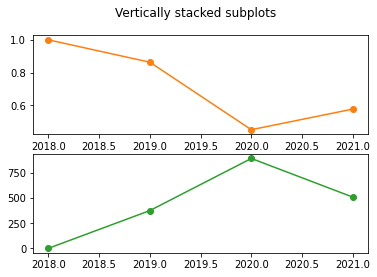

In [243]:
data_for_plot1 = year_likes["mean of likes per post"]
data_for_plot2 = year_likes["num of posts"]

plot_vk(data_for_plot1, data_for_plot2)

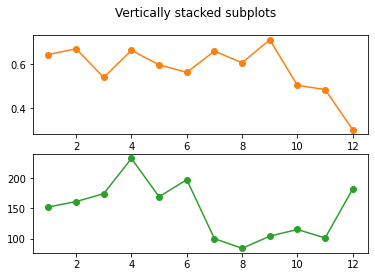

In [244]:
data_for_plot1 = month_likes["mean of likes per post"]
data_for_plot2 = month_likes["num of posts"]

plot_vk(data_for_plot1, data_for_plot2)

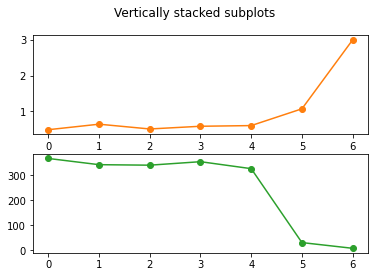

In [245]:
data_for_plot1 = weekday_likes["mean of likes per post"]
data_for_plot2 = weekday_likes["num of posts"]

plot_vk(data_for_plot1, data_for_plot2)

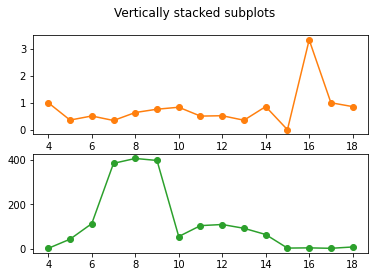

In [246]:
data_for_plot1 = hour_likes["mean of likes per post"]
data_for_plot2 = hour_likes["num of posts"]

plot_vk(data_for_plot1, data_for_plot2)

## TODO: seaborn should be used